In [1]:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


# Data Cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [39]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [50]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
len(df)

103

In [11]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [13]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [7]:
df = df.dropna().reset_index()

In [70]:
df = df.drop(["index","Unnamed: 0"],axis = 1)
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [32]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

In [21]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [288]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [290]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [11]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

## How many countries produce sugarcane from each Continent?

In [13]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

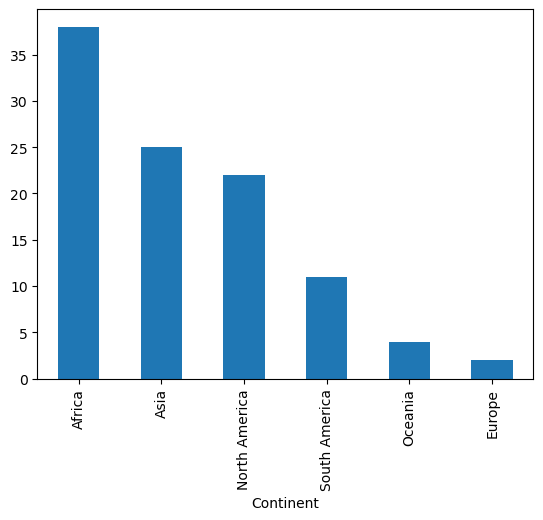

In [15]:
df["Continent"].value_counts().plot(kind = "bar")

Africa has the highest number of countries producing sugarcane.

In [50]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Univariate Analysis

## Finding Outliers

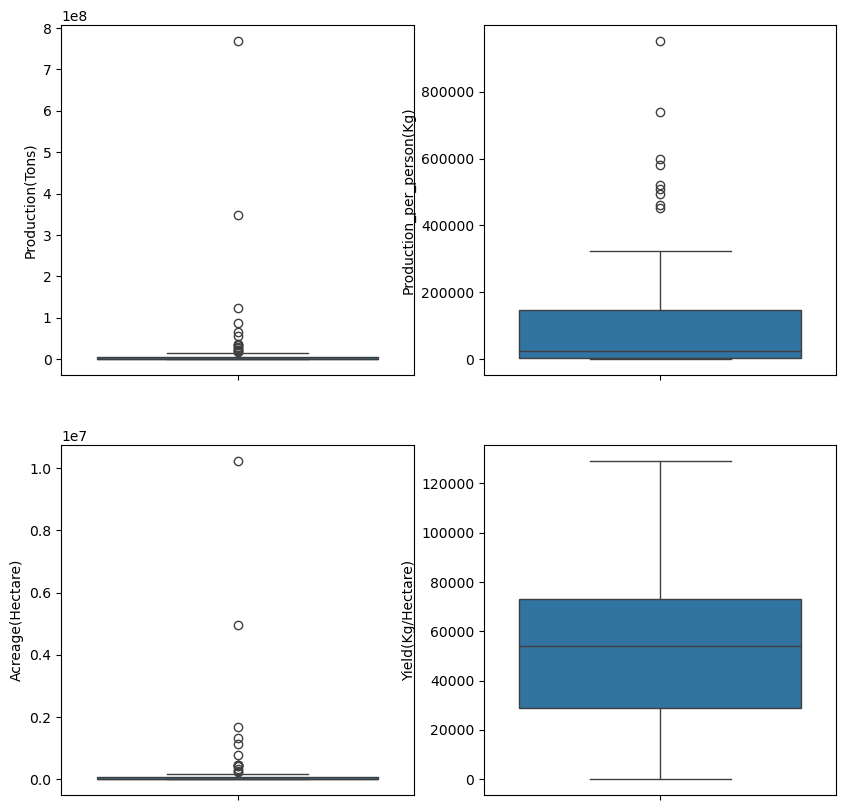

In [17]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.show()

We have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

## Distribution of columns

C:\Users\91776\AppData\Local\Temp\ipykernel_21688\1909675950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\91776\AppData\Local\Temp\ipykernel_21688\1909675950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\9177

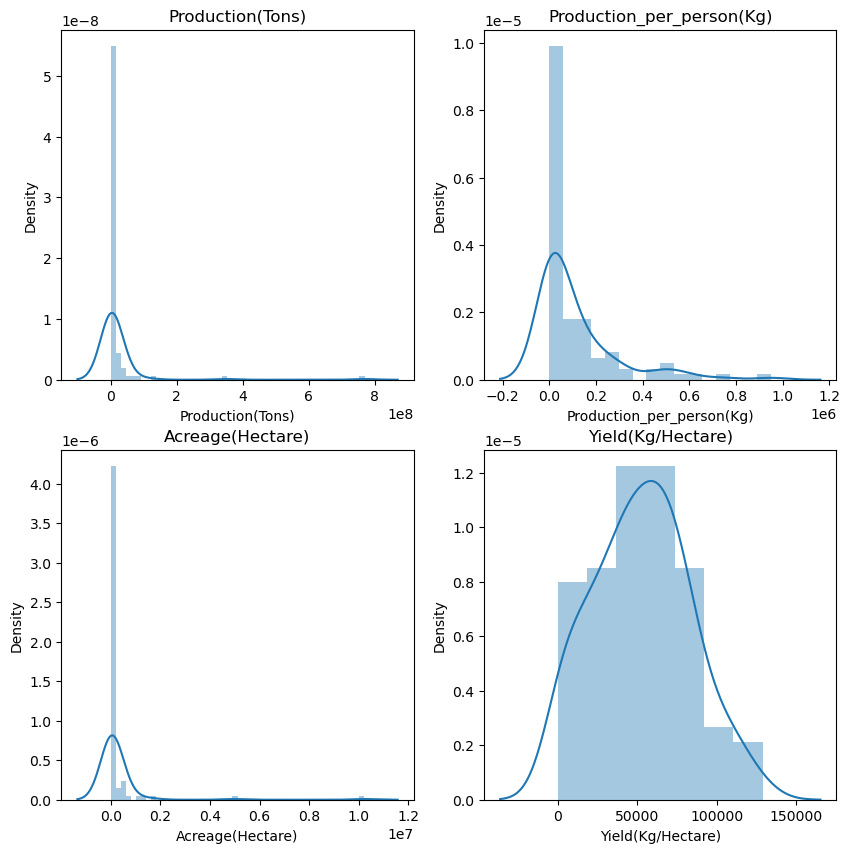

In [61]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

These distplots gives us an idea about the central tendency of each columns


# Bivariate Analysis

In [101]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Country with Maximum production of sugarcane

In [21]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [23]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [33]:
df_new["Production(Tons)_percentage"] = round((df_new["Production(Tons)"] * 100)/df_new["Production(Tons)"].sum(), 3)

In [35]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,40.727
India,348448000.0,18.462
China,123059739.0,6.520
Thailand,87468496.0,4.634
Pakistan,65450704.0,3.468
...,...,...
Spain,394.0,0.000
Lebanon,97.0,0.000
Singapore,50.0,0.000


<Axes: ylabel='Production(Tons)'>

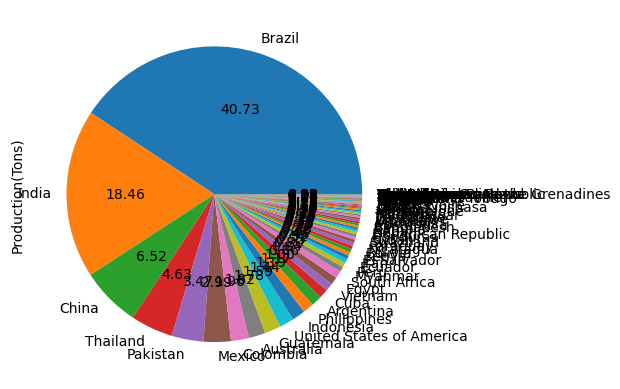

In [37]:
df_new["Production(Tons)"].plot(kind = "pie",autopct = "%.2f")

## In bar form

C:\Users\91776\AppData\Local\Temp\ipykernel_14848\1614648809.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


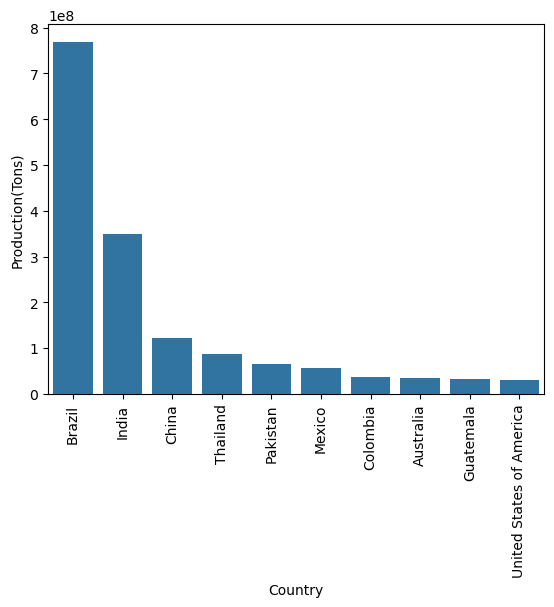

In [99]:
ax = sns.barplot(data = df_new.head(10),x = "Country",y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

Clearly Brazil has the Highest Production for Sugarcane

## WHich country has the largest land for sugarcane production?

In [124]:
df_acr = df.sort_values("Acreage(Hectare)",ascending = False).head(10)
df_acr

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
10,Indonesia,Asia,27158830.0,10248.000,472693.0,57455.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
13,Cuba,North America,18890972.0,1683.528,442307.0,42710.1
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5


C:\Users\91776\AppData\Local\Temp\ipykernel_14848\2092951158.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


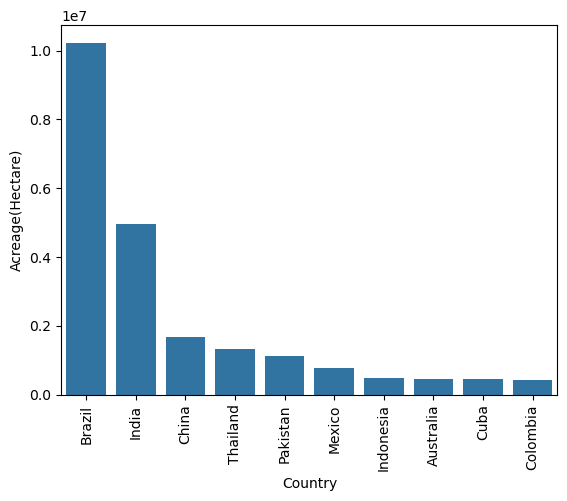

In [138]:
ax = sns.barplot(data = df_acr ,x = "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Brazil has the largest land for Sugarcane Production

## Which country has the highest yield per hectare?

df_yld = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(10)
df_yld

C:\Users\91776\AppData\Local\Temp\ipykernel_14848\2896950975.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


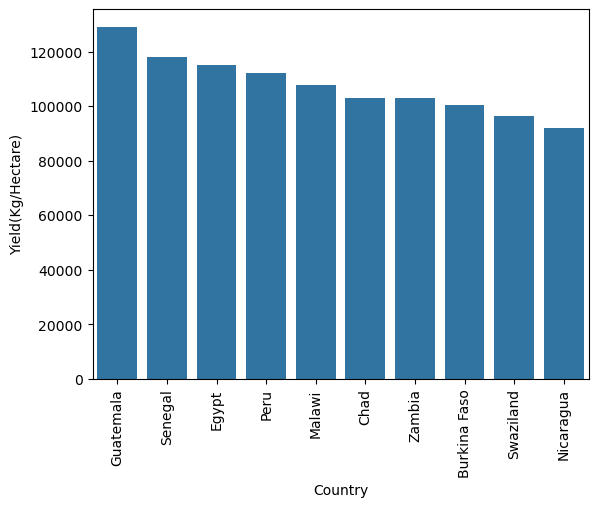

In [158]:
ax = sns.barplot(data = df_yld,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

Guatemala has the highest yield per hectare

## Which Country has the highest production per person?

In [170]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production (Tons),Acreage (Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5,768678382.0,10226205.0
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5,348448000.0,4950000.0
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1,123059739.0,1675215.0
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2,87468496.0,1336575.0
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0,65450704.0,1130820.0


In [174]:
df_ppp = df.sort_values("Production_per_person(Kg)", ascending = False).head(10)
df_ppp

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Production (Tons),Acreage (Hectare)
25,Paraguay,South America,6708000.0,951087.0,120.0,559.0,6708000.0,120.0
6,Colombia,South America,36951213.0,740075.0,416626.0,88691.5,36951213.0,416626.0
55,Trinidad and Tobago,North America,810.0,597066.0,15.0,54.0,810.0,15.0
42,Panama,North America,2419638.0,581814.0,37995.0,63683.1,2419638.0,37995.0
51,Jamaica,North America,1422432.0,521254.0,26255.0,54178.2,1422432.0,26255.0
19,Ecuador,South America,8661609.0,507518.0,104661.0,82758.4,8661609.0,104661.0
12,Argentina,South America,21990823.0,494237.0,331699.0,66297.5,21990823.0,331699.0
29,Dominican Republic,North America,4717490.0,459519.0,10681.0,44167.0,4717490.0,10681.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0,56446821.0,781054.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,65450704.0,1130820.0


C:\Users\91776\AppData\Local\Temp\ipykernel_14848\1660629930.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


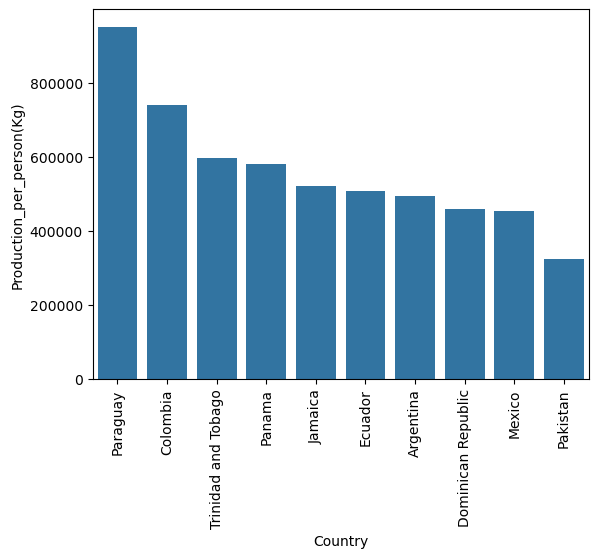

In [176]:
ax = sns.barplot(data = df_ppp,x = "Country",y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Paraguay has the largest production per person

# Correlation

In [223]:
df = df.drop(df.iloc[:,6:],axis = 1)

In [225]:
df.iloc[:,2:].corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


This correlation gives us an idea about the relation between two columns

## Do countries with highest land produce more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

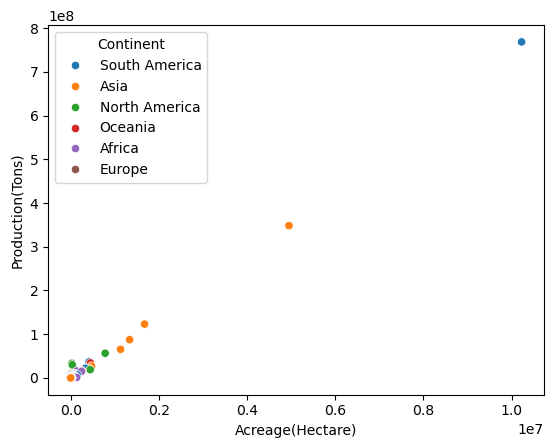

In [228]:
sns.scatterplot(data = df ,x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent")

This clearly shows that countries with more land produce more

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

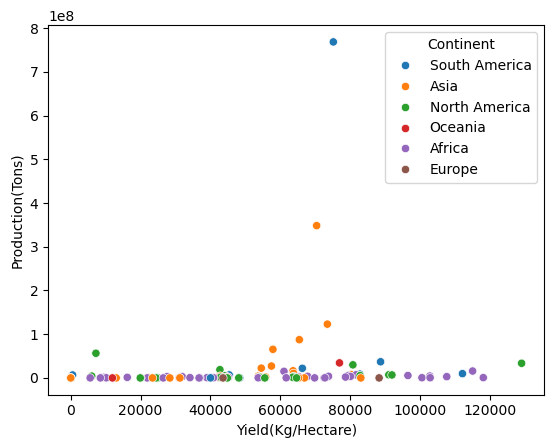

In [232]:
sns.scatterplot(data = df ,x = "Yield(Kg/Hectare)", y = "Production(Tons)", hue = "Continent")

As we can see there is no connection between yield and produce

# Analysis for continents

In [241]:
df_continent = df.groupby("Continent").sum()
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [243]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane?

<Axes: ylabel='Production(Tons)'>

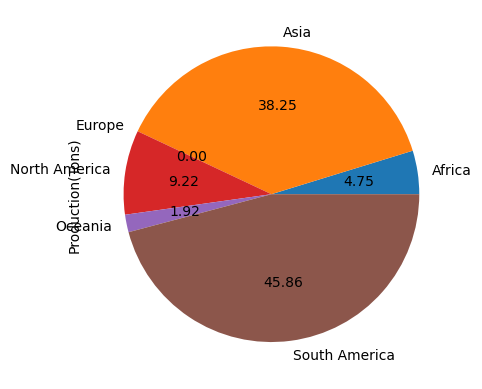

In [283]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Continent'>

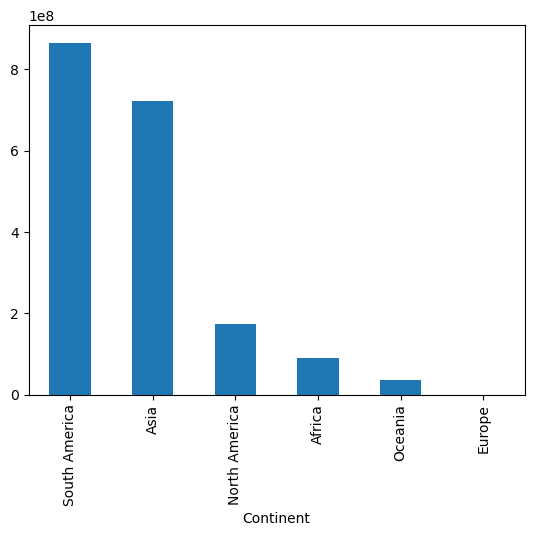

In [256]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

It is clear that South America produces more sugarcane

## Do number of countries in a Continent effects production of sugarcane?

In [260]:
df_continent.iloc[:,1:].corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


As per this correaltion table number of countries shouldn't affect the production of sugarcane but lets see using data visulization

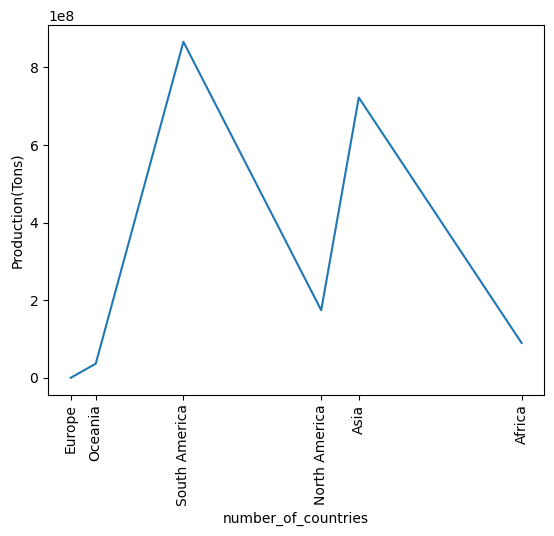

In [264]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

As we can see the number of countries does not have anything to do with the production of sugarcane

## Do continent with largest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

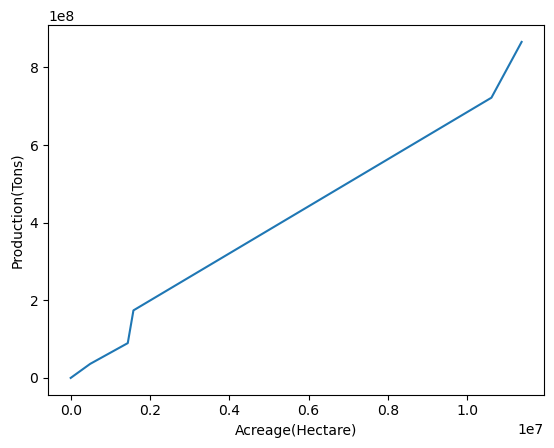

In [279]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

Yes Continents with largest land does produce more